In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('messi5.jpg')

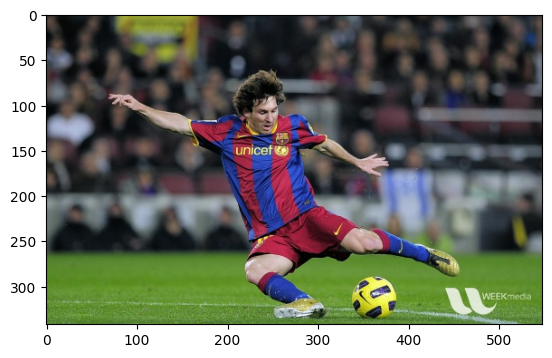

In [3]:
plt.imshow(img[:,:,::-1])

In [4]:
mask = np.zeros(img.shape[:2],np.uint8)

In [6]:
bgdModel = np.zeros((1,65),np.float64) #GMM   5* 13 = 65,  3/*mean*/ + 9/*covariance*/ + 1/*component weight
fgdModel = np.zeros((1,65),np.float64) 

In [7]:
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)  # BG, PRBFG
img1 = img*np.where((mask==2)|(mask==0),0,1).astype('uint8')[:,:, np.newaxis]
mask1 = mask.copy()  # for debugging 
 

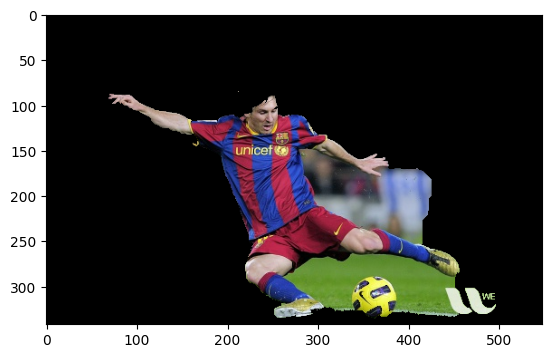

In [8]:
plt.imshow(img1[:,:,::-1])

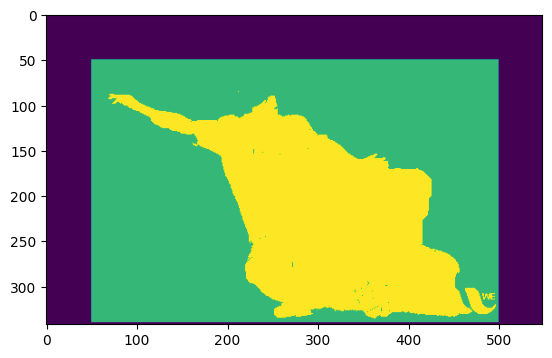

In [9]:
plt.imshow(mask)

In [11]:
newmask = cv2.imread('gc_mask.png',0)

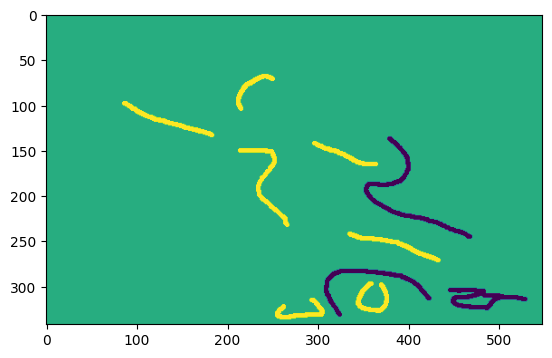

In [12]:
plt.imshow(newmask)

In [13]:
mask[newmask == 0] = 0
mask[newmask == 255] = 1

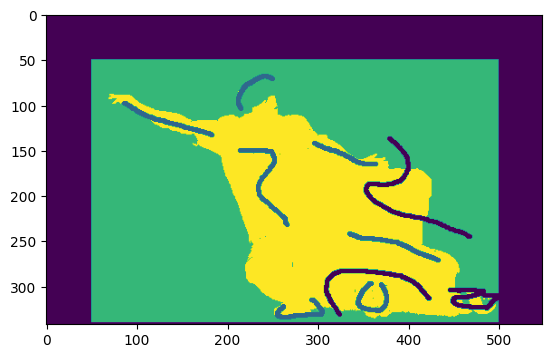

In [14]:
plt.imshow(mask)

In [15]:
mask_before = mask.copy()  # for debugging
cv2.grabCut(img,mask,None,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_MASK)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.10709270e-01, 2.95951000e-01, 8.33924276e-02, 2.32893950e-01,
         1.77053352e-01, 5.09277419e+01, 1.40583674e+02, 9.97050284e+01,
         3.18295708e+01, 2.88645728e+01, 2.61330781e+01, 1.53664027e+02,
         1.50941392e+02, 1.38685369e+02, 6.13521299e+01, 5.95019553e+01,
         6.36673035e+01, 9.60315703e+01, 9.60020419e+01, 9.83240664e+01,
         1.43422917e+02, 6.56001137e+01, 8.07313255e+01, 6.56001137e+01,
         1.70334658e+02, 1.21888150e+02, 8.07313255e+01, 1.21888150e+02,
         2.45386332e+02, 1.15828761e+02, 1.07821971e+02, 1.09873088e+02,
         1.07821971e+02, 1.06996130e+02, 1.10780103e+02, 1.09873088e+02,
         1.10780103e+02, 1.26327917e+02, 7.91562153e+02, 4.69758550e+02,
         5.04405922e+02, 4.69758550e+02, 6.1

In [16]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]

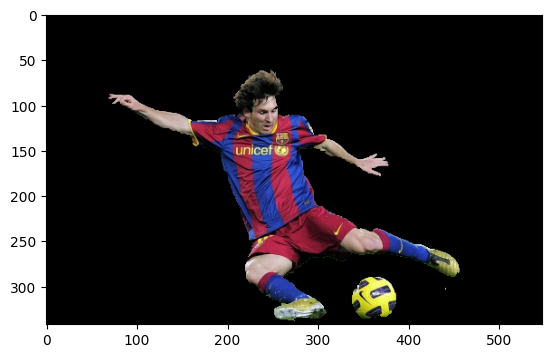

In [17]:
plt.imshow(img2[:,:,::-1])

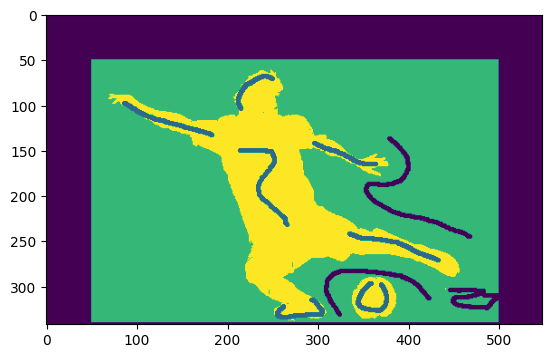

In [18]:
plt.imshow(mask)